In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def train_constraint(sigma_tot, L, eta):
    return (eta**2 * L/2 - eta) * (L * sigma_tot)**2

def eval_constraint(pts, B, sigma_tot):
    coeff = 1 / np.sqrt(2 * np.pi)
    p_t_given_s = pts
    exponent = - (1 / (2 * B * sigma_tot**2))**2
    result = coeff * p_t_given_s * np.exp(exponent)
    return result


# Training

<ipython-input-13-a48593e74555>:29: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-13-a48593e74555>:38: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


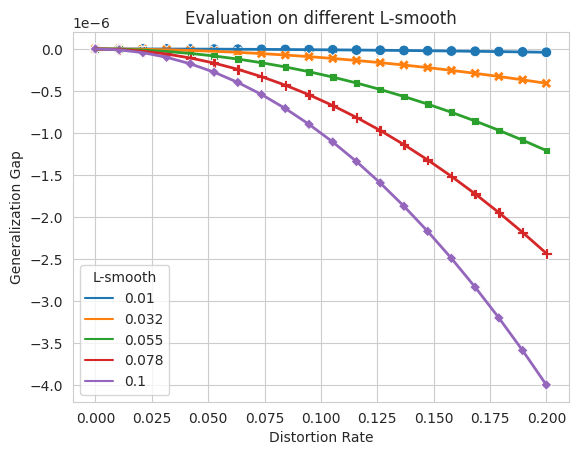

<ipython-input-13-a48593e74555>:29: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-13-a48593e74555>:38: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


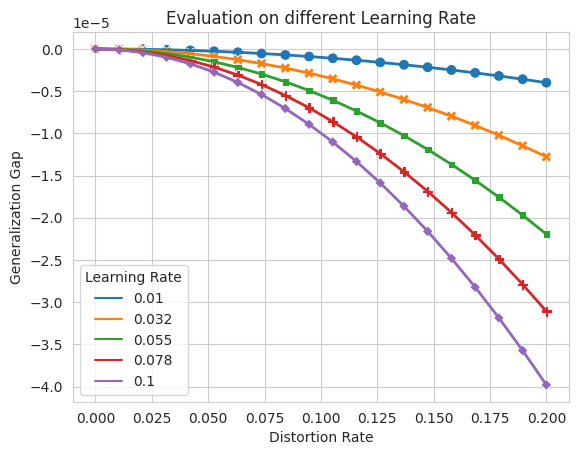

In [ ]:
sigma_tot_values = np.linspace(0, 0.2, 20)
L_values = np.around(np.linspace(0.01, 0.1, 5),3)
eta_values = np.around(np.linspace(0.01, 0.1, 5),3)

case_item = "train"
losses = []
for sigma_tot in sigma_tot_values:
    for L in L_values:
        for eta in eta_values:
            result = train_constraint(sigma_tot, L, eta)
            losses.append([sigma_tot, L, eta, result])

losses_df = pd.DataFrame(losses, columns=['sigma_tot', 'L-smooth', 'Learning Rate', 'loss'])

colorset =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

key_draw_x = 'sigma_tot'
key_draw_y = 'loss'
key_list = ['L-smooth', 'Learning Rate']

for key_idx, key_val in enumerate(key_list):
    if key_val == 'L-smooth':
        fixed_eta = np.random.choice(eta_values)  # Choose a random value of eta
    else:
        fixed_eta = np.random.choice(L_values)  # Choose a random value of eta

    sns.set_style("whitegrid")  # Turn on the grid
    sns.lineplot(
        x=key_draw_x,
        y=key_draw_y,
        data=losses_df[losses_df[key_list[1-key_idx]] == fixed_eta],
        hue=key_list[key_idx],
        linewidth=2,
        # linestyle='dashed',
        palette=colorset
        )
    sns.scatterplot(
        x=key_draw_x,
        y=key_draw_y,
        data=losses_df[losses_df[key_list[1-key_idx]] == fixed_eta],
        hue=key_list[key_idx],
        palette=colorset,
        style=key_list[key_idx],
        s=60,
        legend=False
        )
    plt.xlabel('Distortion Rate')
    plt.ylabel('Generalization Gap')
    plt.title(f'Evaluation on different {key_list[key_idx]}')
    values = losses_df[key_list[key_idx]].unique()
    legend_labels = [f'o={value}' for value in values]
    plt.legend(loc='lower left',fontsize='medium',title=key_list[key_idx])
    plt.savefig(f'{case_item}_plot_{key_list[key_idx]}.pdf', dpi=300)  # Save as PDF
    plt.show()

<ipython-input-15-eb09c56c796e>:28: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-15-eb09c56c796e>:37: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


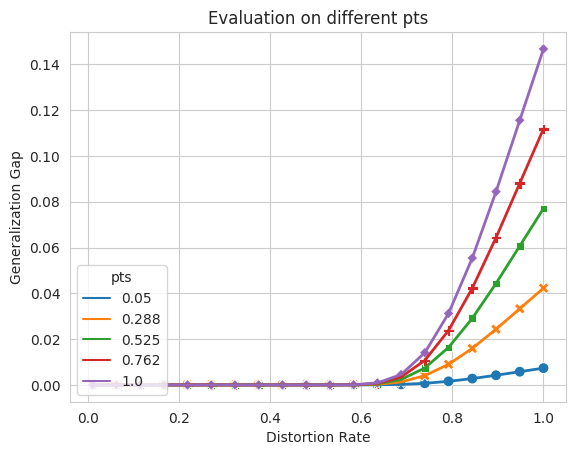

<ipython-input-15-eb09c56c796e>:28: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(
<ipython-input-15-eb09c56c796e>:37: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


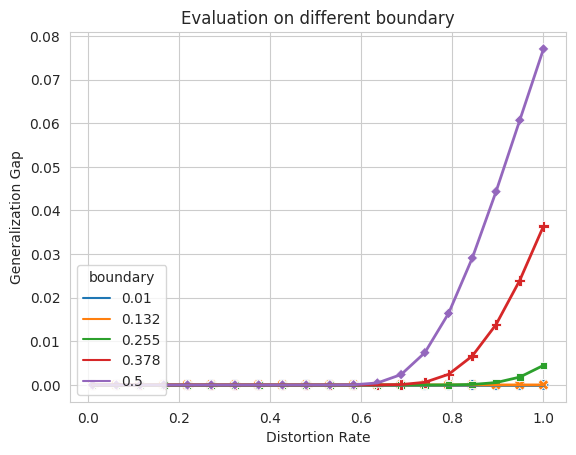

In [ ]:
sigma_tot_values = np.linspace(0.01, 1, 20)
B_values = np.around(np.linspace(0.01, 0.5, 5),3)
pts_values = np.around(np.linspace(0.05, 1, 5),3)

case_item = "inf"
losses = []
for sigma_tot in sigma_tot_values:
    for B in B_values:
        for pts in pts_values:
            loss_gap = eval_constraint(pts, B, sigma_tot)
            losses.append([sigma_tot, pts, B, loss_gap])

losses_df = pd.DataFrame(losses, columns=['sigma_tot', 'pts', 'boundary', 'accuracy'])

colorset =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

key_draw_x = 'sigma_tot'
key_draw_y = 'accuracy'
key_list = ['pts','boundary']

for key_idx, key_val in enumerate(key_list):
    if key_val == 'pts':
        fixed_eta = np.random.choice(B_values)  # Choose a random value of eta
    else:
        fixed_eta = np.random.choice(pts_values)  # Choose a random value of eta
    sns.set_style("whitegrid")  # Turn on the grid
    sns.lineplot(
        x=key_draw_x,
        y=key_draw_y,
        data=losses_df[losses_df[key_list[1-key_idx]] == fixed_eta],
        hue=key_list[key_idx],
        linewidth=2,
        # linestyle='dashed',
        palette=colorset
        )
    sns.scatterplot(
        x=key_draw_x,
        y=key_draw_y,
        data=losses_df[losses_df[key_list[1-key_idx]] == fixed_eta],
        hue=key_list[key_idx],
        palette=colorset,
        style=key_list[key_idx],
        s=60,
        legend=False
        )
    plt.xlabel('Distortion Rate')
    plt.ylabel('Generalization Gap')
    plt.title(f'Evaluation on different {key_list[key_idx]}')
    values = losses_df[key_list[key_idx]].unique()
    legend_labels = [f'o={value}' for value in values]
    plt.legend(loc='lower left',fontsize='medium',title=key_list[key_idx])
    plt.savefig(f'{case_item}_plot_{key_list[key_idx]}.pdf', dpi=300)  # Save as PDF
    plt.show()

In [ ]:
pts=1
B=0.1
sigma_tot=1
print(eval_constraint(pts, B, sigma_tot))

5.540487995575833e-12
